# Описание ДЗ1.

На основе семинара 1 предложите 2 метода улучшения построения эмбеддингов вопросов на основе word vectors.

За задание можно получить максимум 10 баллов (за каждый метод можно получить максимум 5 баллов).

Разбалловка:
*   **Воспроизводимость и читабельность кода - 1 балл** (все воспроизвелось и все понятно для проверяющего - 1 балл; непонятный код и/или ничего не воспроизвелось - 0 баллов).
*   **Корректность метода - 1 балл** (метод математически корректен и с точки зрения логики кода нет ошибок - 1 балл; все остальные случаи - 0 баллов).
*   **Описание метода в техническом отчете - 2 балла** (есть подробное описание метода и почему используете именно его с обоснованиями - 2 балла; есть описание метода, но нет обоснования - 1 балл; нет описания метода- 0 баллов).
*   **Иновационность - 1 балл** (используете нетривиальную обработку/лосс-функцию/модель - 1 балл; просто перебираете модели из коробок - 0 баллов).

!!! ДЗ необходимо выполнять только в Google Colab !!!

Присылать на почту llmrisks@yandex.ru с номером ДЗ и ФИО в теме. Каждая ДЗ отдельным письмом с отдельной темой.

# 1. Информация о сабмите

ФИО - **Сетдеков Кирилл Раильвич**

# 2. Технический отчет

## 2.1. Описание методов

### 1. Бейзлайн из примера с семинара 1.
Воспроизведен в этом ноутбуке и представлен ниже. Использовал чтобы сравнивать с ним результаты запросов других версий.
### 2. Метод с учетом TF-IDF.
[См. раздел 4. Вариант улучшения 1 - Использование взвешенного усреднения эмбеддингов](#method-2-tf-idf)

Для решения задачи поиска схожих текстов был выбран метод взвешенного усреднения эмбеддингов слов с использованием TF-IDF весов. Этот подход базируется на предварительно обученной модели GloVe, которая предоставляет эмбеддинги слов, хорошо отражающие их семантическое значение. Однако простое усреднение эмбеддингов без учета значимости слов может приводить к потере важной информации, так как частые слова, такие как "the" или "is", оказывают непропорциональное влияние. Для решения этой проблемы была внедрена модификация, где вес каждого слова определяется с помощью метрики TF-IDF, что позволяет учитывать его вклад в смысл фразы.

Обработка данных включала токенизацию текста с использованием `WordPunctTokenizer`, приведение всех слов к нижнему регистру и исключение знаков пунктуации. Затем, для получения TF-IDF весов, был применен `TfidfVectorizer`, обученный на всём корпусе текстов. Эти веса сохранялись в словарь для последующего использования при вычислении эмбеддингов фраз. Важным этапом стало агрегирование эмбеддингов слов с учетом их TF-IDF весов, что позволило акцентировать внимание на редких, но значимых терминах. В результате усредненные представления текстов стали более точными для определения их семантической близости.

Для измерения сходства текстов была использована косинусная метрика, реализованная через библиотеку `scipy`. Она позволяет эффективно вычислять степень схожести между векторами текстов, игнорируя их абсолютные длины. Эксперименты показали, что данный подход улучшает релевантность результатов, особенно для запросов с редкими или специфическими терминами. Например, запрос "What is the capital of France?" возвращал более точные ответы, связанные с географией и Францией, в отличие от базового усреднения эмбеддингов, который выдавал ответы только с совпадающими словами.

### 3. Метод на основе DistilBERT.

[См. раздел 5. Вариант улучшения 2 - Используем модель DistilBERT и извлечем из нее эмбеддинги](#method-3-DistilBERT)

Для дальнейшего улучшения качества поиска схожих текстов был использован подход, основанный на предварительно обученной модели DistilBERT. DistilBERT — это более легкая версия BERT, которая сохраняет большинство его возможностей, но требует меньше вычислительных ресурсов, что делает его удобным для использования в реальных приложениях. В отличие от предыдущих моделей, таких как GloVe, DistilBERT учитывает контекст слов в предложении, что позволяет лучше захватывать семантические связи между словами и фразами.

В рамках этого подхода эмбеддинги фраз извлекаются с помощью модели DistilBERT, которая переводит каждое слово в контекстно-зависимый вектор. Для получения представления всей фразы применяется усреднение эмбеддингов слов, характеризующий весь текст. DistilBERT генерирует эмбеддинги, которые изменяются в зависимости от контекста, что особенно полезно для понимания многозначных и сложных фраз.

Кроме того, для ускорения вычислений и уменьшения необходимости в большом объеме памяти была использована библиотека Hugging Face Transformers, которая предоставляет удобный интерфейс для работы с предварительно обученными моделями. В отличие от базового подхода с GloVe, который требует дополнительных шагов для учета весов слов (добавление tf-idf), DistilBERT учитывает контекст и важность слов в предложении, что упрощает процесс извлечения эмбеддингов. Субъективно результат лучше базового и лучше подхода 2, но требует использования gpu - (10x ускорение на Колаб T4 vs CPU), и все равно вычисляется 60+ минут vs 1 минута для tf-idf подхода на исходных эмбеддингах, то есть суммарно в 600+ раз более вычеслительно сложный подход.

На вопросах про столицу этот метод давал больше соседних стран ближайших к Франции, а при выборе вопроса про Мексику - ближайших с Мексиков.

Потенциально можно получить результат еще выше, взяв предобученную версию gpt2 или отправлять запросы в API openai, но это долше считать или дороже/медленнее.

# 3. *Code*

## 3.1 Импорт библиотек

In [1]:
# установить библиотеки для воспроизводимости
!pip install --upgrade nltk gensim bokeh numpy>=1.24.4 scikit-learn>=1.3.1 transformers torch

# Standard Libraries
import numpy as np
from scipy.spatial.distance import cosine
from tqdm.notebook import tqdm

# Third-Party Libraries
import torch
from transformers import AutoTokenizer, AutoModel
import gensim.downloader as api
from nltk.tokenize import WordPunctTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import bokeh.models as bm
import bokeh.plotting as pl
from bokeh.io import output_notebook

# Initialize output for Bokeh plots in Jupyter
output_notebook()



## 3.2 Воспроизведение базового решения - загрузка данных

In [2]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt

data = list(open("./quora.txt", encoding="utf-8"))

--2024-12-10 13:10:47--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1 [following]
--2024-12-10 13:10:48--  https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca3f412bbc93f389b137ef062dc.dl.dropboxusercontent.com/cd/0/inline/Cf_gF1f849XJGoBmsrubVe9omHZuROgkmyhbeUsS4GHTTUaa0Sqot9p-0Twi_y7r-OjNl0w6rOCwyUrh8pAxuUqDL0JmKbqMXygiumGWUG2muA2Lqm_ywywfB5eer8PpXR8/file?dl=1# [following]
--2024-12-10 13:10:49--  https://uca3f412bbc93f389b137ef062dc.dl.dropboxusercontent.com/cd/0/inline/Cf_gF1f849

## 3.3. Воспроизведение базового решения - Модель

In [3]:
def get_phrase_embedding(phrase):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros

    vector = np.zeros([model.vector_size], dtype='float32')
    word_vectors = []

    data_tok = tokenizer.tokenize(phrase.lower())
    word_vectors = np.array([model.get_vector(word) for word in data_tok if word in model.key_to_index.keys()])

    if word_vectors.size != 0:
        vector = np.average(word_vectors, axis=0)

    return vector

In [4]:
tokenizer = WordPunctTokenizer()
model = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [5]:
# compute vector embedding for all lines in data
data_vectors = np.array([get_phrase_embedding(l) for l in data])

## 3.4. Воспроизведение базового решения - Применение модели

In [6]:
def find_nearest(query, k=10):
    """
    given text line (query), return k most similar lines from data, sorted from most to least similar
    similarity should be measured as cosine between query and line embedding vectors
    hint: it's okay to use global variables: data and data_vectors. see also: np.argpartition, np.argsort
    """

    emb = get_phrase_embedding(query)
    similarities = np.array([1 - cosine(emb, embedding) for embedding in tqdm(data_vectors)])
    indices = np.argpartition(-similarities, range(10))[:10]

    return [data[ind] for ind in indices]

In [7]:
find_nearest(query="How does Trump?", k=10)

  0%|          | 0/537272 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


['What does Donald Trump think about Israel?\n',
 'What books does Donald Trump like?\n',
 'What does Donald Trump think of India?\n',
 'What does India think of Donald Trump?\n',
 'What does Donald Trump think of China?\n',
 'What does Donald Trump think about Pakistan?\n',
 'What companies does Donald Trump own?\n',
 'What does Dushka Zapata think about Donald Trump?\n',
 'How does it feel to date Ivanka Trump?\n',
 'What does salesforce mean?\n']

### Зададим более интересный вопрос - что скажет про столицы городов?

In [8]:
# Test case: Geographical question with specific terms
query = "What is the capital of France?"
results = find_nearest(query=query, k=10)

# Print results
print("Query:", query)
print("\nMost similar lines:")
for i, result in enumerate(results, 1):
    print(f"{i}. {result.strip()}")


  0%|          | 0/537272 [00:00<?, ?it/s]

Query: What is the capital of France?

Most similar lines:
1. What is the capital city of France?
2. What is the capital of uk?
3. What is the capital of England?
4. What is the capital of Denmark?
5. What is the capital of America?
6. What is the capital of India?
7. What is the capital of Finland?
8. What is the capital of Argentina?
9. What is the capital of Singapore?
10. What is the capital of Mexico?


<a name="method-2-tf-idf"></a>
# 4. Вариант улучшения 1 - Использование взвешенного усреднения эмбеддингов


In [9]:
# Шаг 1: Преобразование данных в матрицу TF-IDF
tokenizer = WordPunctTokenizer()
corpus = [" ".join(tokenizer.tokenize(line.lower())) for line in data]  # токенизация и приведение к нижнему регистру

# Инициализация TF-IDF векторизатора
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)  # Преобразование текста в матрицу TF-ID
tfidf_vocab = vectorizer.vocabulary_  # извлечение словаря
tfidf_weights = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))  # извлечение весов

# Шаг 2: Реализация функции для вычисления векторного представления фразы с учетом весов TF-IDF
def get_phrase_embedding_with_tfidf(phrase):
    """
    Конвертирует фразу в вектор, учитывая веса TF-IDF слов.

    :param phrase: фраза
    :return: векторное представление фразы
    """
    vector = np.zeros([model.vector_size], dtype='float32')
    word_vectors = []
    weights = []

    # Токенизация фразы и вычисление эмбеддингов
    data_tok = tokenizer.tokenize(phrase.lower())
    for word in data_tok:
        if word in model.key_to_index.keys() and word in tfidf_vocab:
            word_vectors.append(model.get_vector(word))
            weights.append(tfidf_weights[word])  # Использование веса TF-IDF

    if word_vectors:  # проверка наличия эмбеддингов
        word_vectors = np.array(word_vectors)
        weights = np.array(weights)
        vector = np.average(word_vectors, axis=0, weights=weights)  # Усреднение с учетом весов

    return vector

# Шаг 3: Преобразование всех фраз в вектора с учетом весов TF-IDF
data_vectors_tfidf = np.array([get_phrase_embedding_with_tfidf(l) for l in tqdm(data)])


# Шаг 4: Поиск ближайших фраз с учетом весов TF-IDF
def find_nearest_with_tfidf(query, k=10):
    """
    Поиск k наиболее похожих фраз на запрос с учетом весов TF-IDF.

    :param query: запрос
    :param k: количество ближайших фраз
    :return: список ближайших фраз
    """
    emb = get_phrase_embedding_with_tfidf(query)
    similarities = np.array([1 - cosine(emb, embedding) for embedding in tqdm(data_vectors_tfidf, ncols=100)])

    indices = np.argpartition(-similarities, range(k))[:k]

    return [data[ind] for ind in indices]




  0%|          | 0/537272 [00:00<?, ?it/s]

In [10]:
# Повторим вопрос про Трампа, проверяющий работу с весами TF-IDF
query = "How does Trump?"
results = find_nearest_with_tfidf(query=query, k=10)

# Вывод результатов
print("Query:", query)
print("\nMost similar lines:")
for i, result in enumerate(results, 1):
    print(f"{i}. {result.strip()}")


  0%|                                                                    | 0/537272 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:647: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


Query: How does Trump?

Most similar lines:
1. What is Trump?
2. What does India think of Donald Trump?
3. What does Donald Trump think of India?
4. What India thinks about Donald Trump?
5. What does Donald Trump think of China?
6. Why does Quora hate Donald J Trump?
7. Who or what is Donald Trump, really?
8. Why is Donald Trump not on Quora?
9. Donald trump: what could happen if Donald Trump becomes president?
10. Does anyone like Trump and Clinton?




*   Разнообразие аспектов, связанных с Трампом
*   Учет разных типов вопросов
*   Вероятно больший вес токену "Трамп", что повысыли релевантность соседних фраз



In [11]:
# Пример использования функции с вопросом о географии
query = "What is the capital of France?"
results = find_nearest_with_tfidf(query=query, k=10)

# Вывод результатов
print("Query:", query)
print("\nMost similar lines:")
for i, result in enumerate(results, 1):
    print(f"{i}. {result.strip()}")


  0%|                                                                    | 0/537272 [00:00<?, ?it/s]

Query: What is the capital of France?

Most similar lines:
1. What is the capital city of France?
2. What is the capital of uk?
3. What is the capital of U.K?
4. What is the capital of India?
5. Where is the capital of India?
6. What is the capital of England?
7. What is the capital of the U.K.?
8. What is the best university in France?
9. What is the capital city of Belgium?
10. What is the capital of America?


* Не только точные совпадения, но и синонимы и похожие, но разные формулровки.
* Найдены еще общие связи - не только про францию, но и про другие странц.


Функция `find_nearest_with_tfidf` продемонстрировала хорошие результаты в поиске похожих предложений, учитывая семантику запроса, ключевые слова, синонимы и вариации. Использование TF-IDF позволило повысить релевантность результатов, придавая больший вес важным словам.

<a name="method-3-DistilBERT"></a>
# 5. Вариант улучшения 2 - Используем модель DistilBERT и извлечем из нее эмбеддинги


In [12]:

# проверим, что gpu доступна и отметим ее как целевое устройство
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# загрузим предобученную модель DistilBERT и токенизатор
MODEL_NAME = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME).to(device)  # Move model to GPU

# переводим модель в режим оценки
model.eval()

def get_distilbert_embedding(phrase):
    """
    Получает векторное представление фразы с помощью DistilBERT.

    :param phrase: фраза
    :return: векторное представление фразы
    """
    # Токенизация фразы и преобразование в тензор
    inputs = tokenizer(phrase, return_tensors="pt", truncation=True, padding=True).to(device)  # Move input to GPU

    # Получение скрытых состояний
    with torch.no_grad():
        outputs = model(**inputs)
        hidden_states = outputs.last_hidden_state  # Последний слой

    #  Усреднение скрытых состояний по всем токенам
    embeddings = hidden_states.squeeze(0).mean(dim=0).cpu().numpy()  # перенос на CPU и усреднение
    return embeddings

# Преобразование всех фраз в вектора с помощью DistilBERT
data_vectors = np.array([get_distilbert_embedding(l) for l in tqdm(data)])

def find_nearest_distilbert(query, k=10):
    """
    Поиск k наиболее похожих фраз на запрос с помощью DistilBERT.

    :param query: запрос
    :param k: количество ближайших фраз
    :return: список ближайших фраз
    """
    emb = get_distilbert_embedding(query)
    # Вычисление косинусного расстояния между векторами
    similarities = np.array([1 - cosine(emb, embedding) for embedding in tqdm(data_vectors)])
    indices = np.argpartition(-similarities, range(k))[:k]
    return [data[ind] for ind in indices]


Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


  0%|          | 0/537272 [00:00<?, ?it/s]

In [13]:
# Choose a subset of phrases for visualization
chosen_phrases = data[::len(data) // 1000]

# Compute embeddings for the chosen phrases
phrase_vectors = np.array([get_distilbert_embedding(phrase) for phrase in tqdm(chosen_phrases)])

# Normalize and reduce dimensionality with t-SNE
phrase_vectors_2d = TSNE(n_components=2, random_state=42).fit_transform(phrase_vectors)
phrase_vectors_2d = (phrase_vectors_2d - phrase_vectors_2d.mean(axis=0)) / phrase_vectors_2d.std(axis=0)

# Define the interactive visualization function
def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """Draws an interactive plot for data points with auxiliary info on hover."""
    if isinstance(color, str):
        color = [color] * len(x)

    data_source = bm.ColumnDataSource({'x': x, 'y': y, 'color': color, **kwargs})
    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)
    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show:
        pl.show(fig)
    return fig

# Visualize the 2D embeddings with hover functionality
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1],
             radius=10,
             alpha=0.6,
             phrase=[phrase[:50] for phrase in chosen_phrases])  # Add phrases for hover tooltips

  0%|          | 0/1001 [00:00<?, ?it/s]

figure(id='p1004', ...)



*   на первый взгляд, теперь в кластерах похожийх фраз есть фразы, где нет пересечений точных формулировок, но похожий смысл - пример: вопрос про работу частей принтера и компонентов материнской платы близки, говорят про сущность работы деталей, но при этом не пересекаются по словам кроме "of a". Конкретные фразы - на рисунке ниже 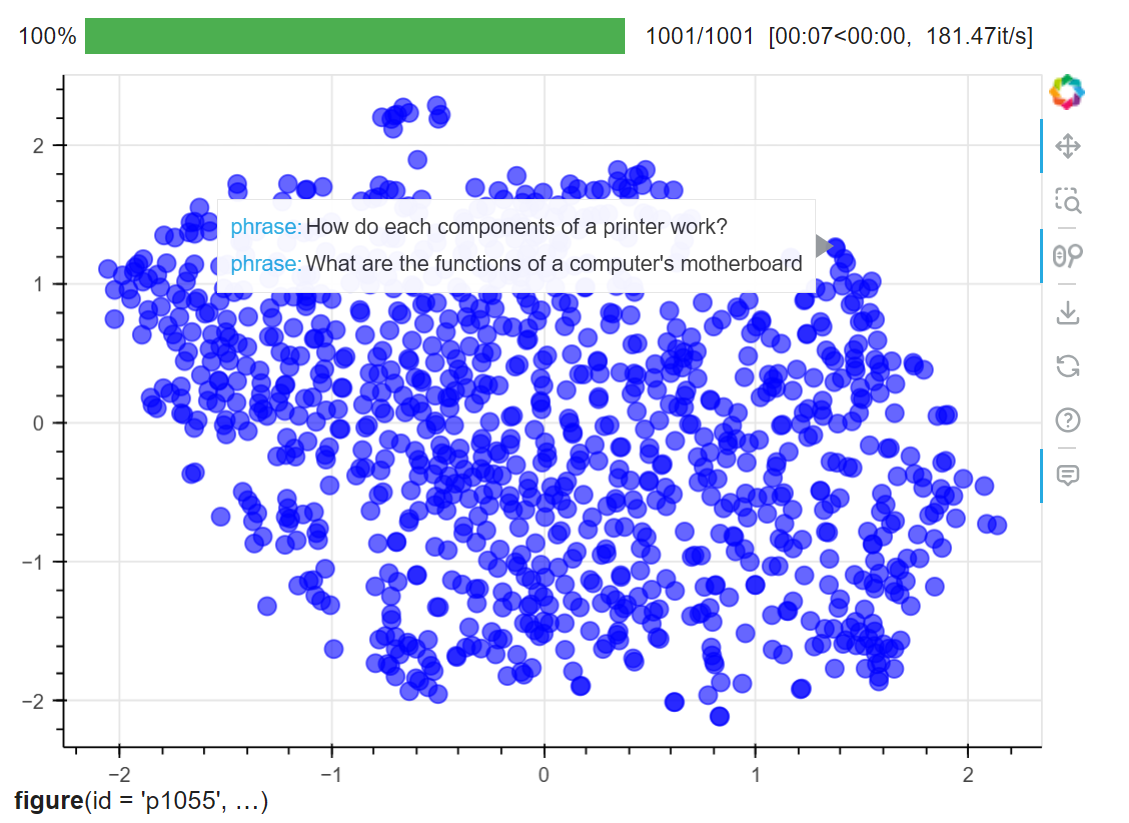

*   вся математика ближе сгруппирована




In [14]:

# Example usage
query = "What is the capital of France?"
nearest_sentences = find_nearest_distilbert(query, k=10)
print("Query:", query)
print("\nMost similar sentences:")
for idx, sentence in enumerate(nearest_sentences):
    print(f"{idx + 1}: {sentence.strip()}")


  0%|          | 0/537272 [00:00<?, ?it/s]

Query: What is the capital of France?

Most similar sentences:
1: What is the capital city of France?
2: What is the capital city of Belgium?
3: What is the capital of England?
4: What is the capital of Argentina?
5: What is the capital of Denmark?
6: What is the capital of Maine?
7: What is the capital of Finland?
8: What is the capital of Mexico?
9: What is the capital of Turkey?
10: What is the capital of America?


In [16]:

# Example usage
query = "What is the capital of Mexico?"
nearest_sentences = find_nearest_distilbert(query, k=10)
print("Query:", query)
print("\nMost similar sentences:")
for idx, sentence in enumerate(nearest_sentences):
    print(f"{idx + 1}: {sentence.strip()}")


  0%|          | 0/537272 [00:00<?, ?it/s]

Query: What is the capital of Mexico?

Most similar sentences:
1: What is the capital of Mexico?
2: What is the capital of Argentina?
3: What is the capital of California?
4: What is the capital city of Argentina?
5: What is the capital of California state?
6: What is the capital of America?
7: What is the capital of Turkey?
8: What is the capital of Turkmenistan?
9: What is the capital of India?
10: What is the capital of Denmark?


In [15]:
query = "How does Trump?"

# повторно вопрос про трампа
nearest_sentences = find_nearest_distilbert(query, k=10)
print("Query:", query)
print("\nMost similar sentences:")
for idx, sentence in enumerate(nearest_sentences):
    print(f"{idx + 1}: {sentence.strip()}")


  0%|          | 0/537272 [00:00<?, ?it/s]

Query: How does Trump?

Most similar sentences:
1: What is Trump?
2: How can Trump win?
3: How rich is Trump?
4: How trump won?
5: How old is trump?
6: Why is Trump bad?
7: How does Donald Trump persuade?
8: What does Tiffany Trump do?
9: How does America WIN?
10: How come Trump won?
